In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("..\Data Analysis\data\ASML_v2.csv")

In [3]:
df.columns

Index(['Date', 'Close', 'Adj Close', 'Volume', 'obv', 'ma6', 'ma10', 'rsi6',
       'rsi10', 'macd', 'dif', 'atr10', 'atr20', 'bias6', 'bias10', 'tapi',
       'year', 'month', 'day', 'direction'],
      dtype='object')

In [4]:
df = df.drop(['Date','Adj Close', 'Volume', 'obv','year', 'month', 'day', 'direction'],axis=1) 

In [5]:
df = df[df > 0].dropna()

In [6]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop(['Close'],axis=1)
y = df.iloc[:,0] #target column i.e Close price

In [12]:
X

,ma6,ma10,rsi6,rsi10,macd,dif,atr10,atr20,bias6,bias10,tapi
1,38.821667,37.937000,56.410881,56.107158,0.514093,0.124948,1.308912,1.086190,0.021389,0.101300,66711.166452
2,39.223334,38.276000,61.495272,59.646698,0.597567,0.166737,1.316021,1.100880,0.079445,0.142400,104415.614498
3,39.258333,38.790000,69.198283,65.215257,0.763051,0.265777,1.339419,1.123336,0.296945,0.225000,185031.671905
4,39.551667,39.301000,73.143621,68.199061,0.949421,0.361718,1.331477,1.130169,0.384722,0.255900,121770.183426
5,40.500001,39.841000,77.454258,71.569661,1.165985,0.462626,1.319329,1.134161,0.396667,0.303900,96422.572378
...,...,...,...,...,...,...,...,...,...,...,...
2723,841.641663,834.983002,65.184828,63.425384,14.873879,3.542582,19.911627,20.171455,1.664724,1.664700,623.745050
2724,843.261658,839.909998,67.627289,64.955921,15.939261,3.686371,18.917461,19.661380,2.243052,1.680997,744.700744
2725,845.031657,844.762995,69.555836,66.140563,16.897846,3.715965,18.562715,19.446811,2.586388,1.578699,802.858648
2726,846.599996,847.706995,68.168980,65.441055,17.369358,3.349981,17.746445,18.994472,2.143338,1.175303,639.238575


In [18]:
type(y.to_numpy().astype('int'))

numpy.ndarray

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X.to_numpy(),y.to_numpy().astype('int'))
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 5 best features

    Specs         Score
10   tapi  2.762772e+07
0     ma6  1.608734e+05
1    ma10  1.587578e+05
4    macd  6.187918e+03
6   atr10  4.751421e+03


[0.14402814 0.14431869 0.07597688 0.08343721 0.09539986 0.08465278
 0.08138904 0.0902125  0.06330689 0.06966272 0.0676153 ]


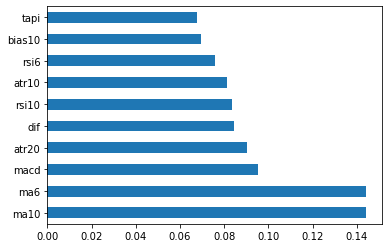

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X.to_numpy(),y.to_numpy().astype('int'))
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

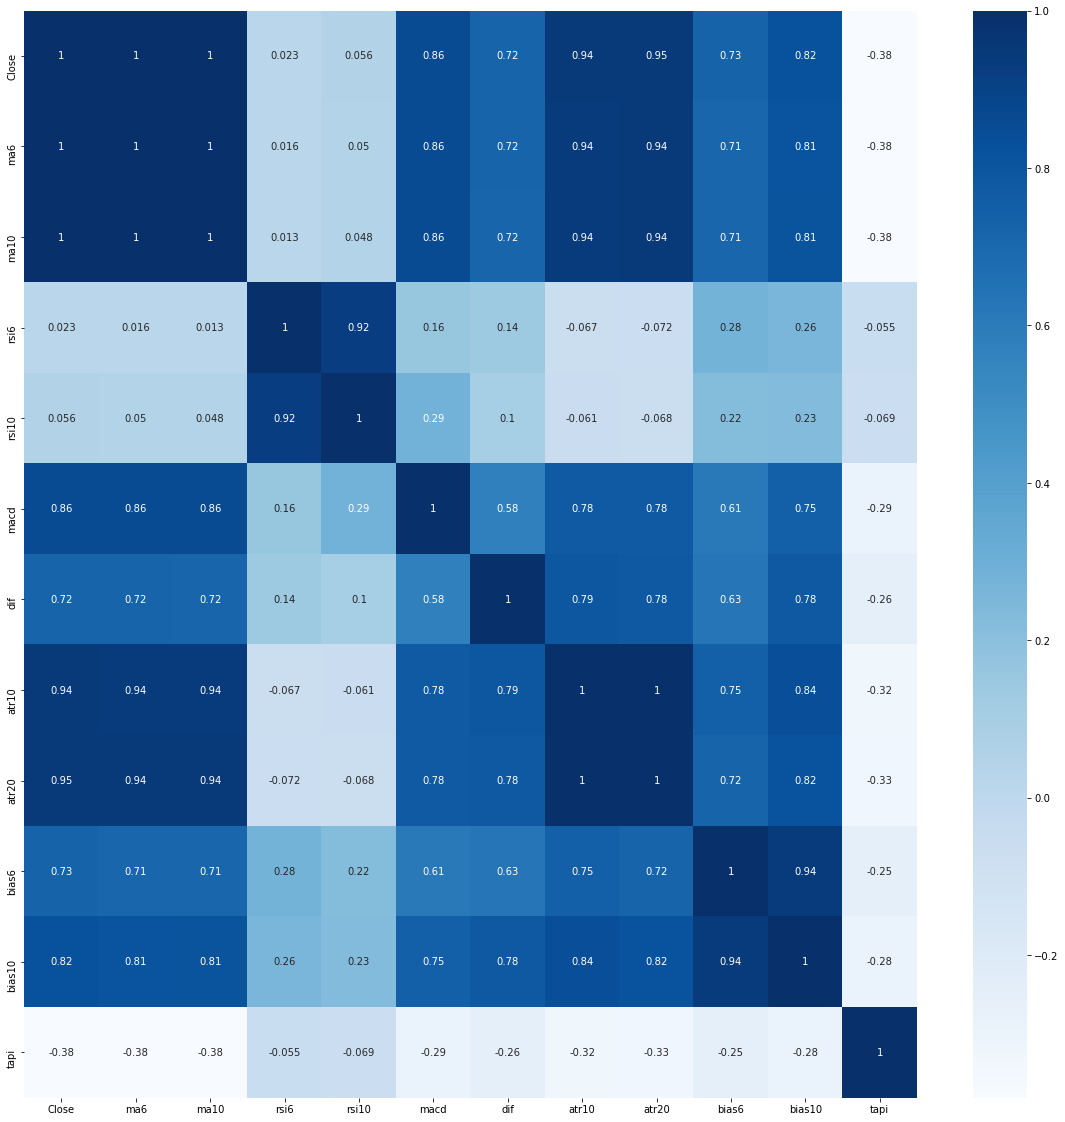

In [25]:
import seaborn as sns


corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="Blues")